In [2]:
from IPython.display import Image
import random 
import numpy as np
import matplotlib.pyplot as pyplot 
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

# we will be using preprocessing to normalize the data
from sklearn.preprocessing import StandardScaler

# we will be using LA to find eigenvectors
from numpy import linalg as LA


from sklearn.decomposition import PCA

%matplotlib inline

### Principal Components Analysis (PCA)

* A popular dimensionality reduction algorithm

* Attemptes to the find the principal axis that reprent the data  to reducing the dimensionality a dataset
  *  A the same time we want to minimizing information loss

* The objective of PCA is to increase interpretability and mitigate the curse of dimensionality


#### Contextualizing PCA projecting on an existing dimension

* Why not just drop one of the dimensions?

![](https://www.dropbox.com/s/9qz14uo03cn2vsh/projecting_on_x.png?dl=1)


#### Contextualizing PCA projecting on an existing dimension

* Or perhaps drop `Y`? 
   * This projection makes the data look "better"

![](https://www.dropbox.com/s/udzu87138zcovn9/projecting_on_y.png?dl=1)



#### Contextualizing PCA projecting on an existing dimension

* Or project on any axis we desire to project on

![](https://www.dropbox.com/s/tcqkgrydas82jes/projecting_on_z.png?dl=1)


#### Selecting the new dimensions

* How do we select the projection axis (or axes) in the data?
  * Given a dataset with dimension $D$, we need to find a new set of dimensions ($d$) such that $d<<D$
* Some new projections are better than other

<img src="https://www.dropbox.com/s/g8ls7jhzy3kl7jx/bad_better_projection.png?dl=1" alt="drawing" style="width:900px;"/>


#### Contextualizing PCA

* We prefer to project on the axis that maximizes the variance in the data. 

* It's helpful to think of the variance as the information that is contained in the data. 

* We want the axis that maximize the information contained in the data.

* This axis, does not have to be one of the axes of the coordinate system.


* If we rotate the data points from the previous example by 45°, then the $x-$axis is no longer the axis that maximizes the variance.



# The Axis Minimizing the Variance

* Now, the line that maximizes the variance is the one that forms 45° angle with the $x-$axis 

![](https://www.dropbox.com/s/otgm3whs20bie81/data_projection_4.png?dl=1)


TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

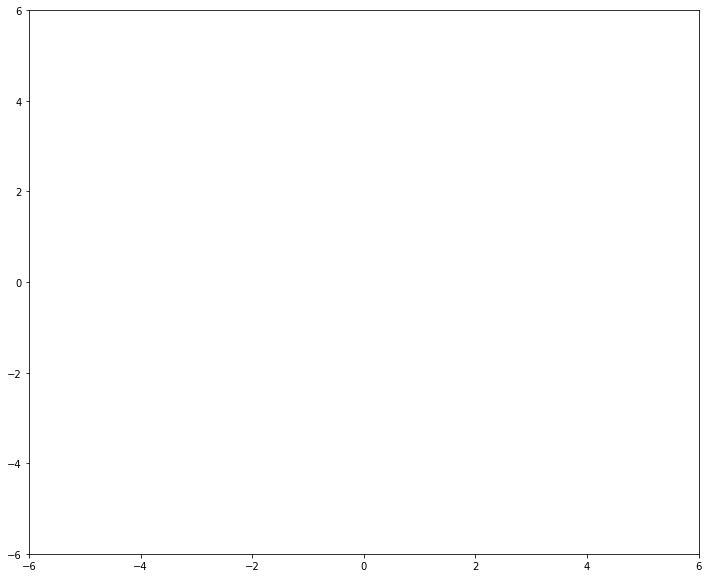

In [3]:

random.seed(246)
x_axis = np.random.normal(0, 2, 30)
x_axis.sort()
noise = np.random.normal(0, 0.5, 30)
y_axis = x_axis * 1.2 + noise

randomData = pd.DataFrame({'x': x_axis, 'y': y_axis})

pyplot.figure(figsize=(12,10))
_ = pyplot.ylim(-6, 6)
_ = pyplot.xlim(-6, 6)

sns.regplot(x_axis, y_axis, ci=False, )

# alternative projection line 1
pyplot.plot(np.arange(-6, 6, 0.06), [0 for _ in np.arange(-6, 6, 0.06)], 'k--', lw=2)
pyplot.text(-4, 0.2, 'proj_line_2')

# alternative projection line 1
pyplot.plot(np.arange(-6, 6, 0.06), [-x/2. for x in np.arange(-6, 6, 0.06)], '-', lw=2)
pyplot.text(-4, 2.2, 'proj_line_3')




<img src="https://www.dropbox.com/s/earjhzutb1yx48x/axes.png?dl=1" alt="drawing" style="width:500px;"/>

<img src="https://www.dropbox.com/s/cupxib5e7k13qcc/projection_vectors_.png?dl=1" alt="drawing" style="width:500px;"/>


In [4]:
randomData

,x,y
0,-6.226472,-7.868343
1,-3.119132,-3.755842
2,-2.397435,-3.171552
3,-2.272777,-3.055429
4,-2.009347,-1.205541
5,-1.781848,-2.584037
6,-1.529388,-1.657505
7,-1.489711,-1.289369
8,-1.407580,-1.020565
9,-1.082565,-2.248967


In [5]:
randomData.dot(np.array([[1],[1]])).head()

,0
0,-14.094815
1,-6.874974
2,-5.568987
3,-5.328206
4,-3.214889


In [6]:
# Best looking projection line
np.var(randomData.dot(np.array([[1],[1]])))[0]

18.91248441011196

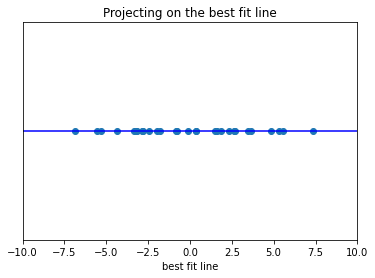

In [7]:
pyplot.xlabel('best fit line')

pyplot.title('Projecting on the best fit line')

pyplot.plot(np.arange(-12,12, 0.1), [0 for _ in np.arange(-12,12, 0.1)], 'b')
pyplot.scatter(randomData.dot(np.array([1,1])), [0 for _ in range(len(randomData))])

pyplot.xlim(-10, 10)

ax = pyplot.gca()

ax.yaxis.set_visible(False)

In [8]:
# Second best looking projection line

np.var(randomData.dot(np.array([[1], [0]])))[0]

3.8268893462564173

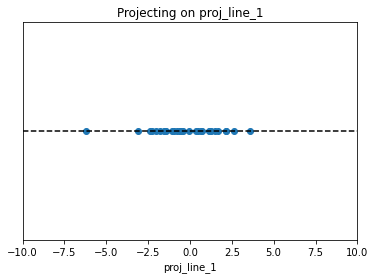

In [9]:
pyplot.xlabel('proj_line_1')
pyplot.title('Projecting on proj_line_1')

pyplot.plot(np.arange(-12,12, 0.1), [0 for _ in np.arange(-12,12, 0.1)], 'k--')
pyplot.scatter(randomData.dot(np.array([[1],[0]])), [0 for _ in range(len(randomData))])

pyplot.xlim(-10, 10)

ax = pyplot.gca()

ax.yaxis.set_visible(False)

In [10]:
# Third best looking projection line

np.var(randomData.dot(np.array([[1], [-0.5]])))[0]

0.6897068967677247

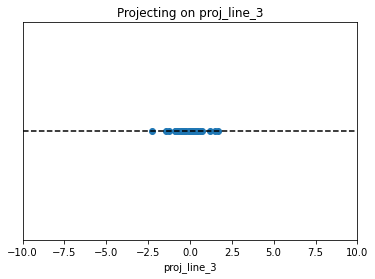

In [11]:
pyplot.xlabel('proj_line_3')
pyplot.title('Projecting on proj_line_3')

pyplot.plot(np.arange(-10,10, 0.1), [0 for _ in np.arange(-10,10, 0.1)], 'k--')
pyplot.scatter(randomData.dot(np.array([[1],[-0.5]])), [0 for _ in range(len(randomData))])

pyplot.xlim(-10, 10)

ax = pyplot.gca()

ax.yaxis.set_visible(False)

### What is PCA?

The objective of PCA is to find the set of axes -- we call them components -- on which we project the data while maintaining as much of the information as possible. 

* PCA finds $D$ set of axes that contain all the information in the data.


* We typically only use two or three if we need to visualize the data
* We pick as many components as needed to capture as much variability in the data as we desire
  * Be able abo to reproduce the original data


### Requirement of the PCA?

* The two important requirements are that:
  * The new components are ranked by how much variability in the data they capture. For instance, the first component captures more variability than the second component, the second more than the third and so on.
  * The components are not correlated -- they are orthogonal.
    * why are orthogonal components not-correlated? 
    * We need this as a constraint to force components to be different, i.e., we need to components to tell us different things about the data

### Eigenvalues and Eigenvectors

* Eigenvalues and eigenvectors are concept of linear algebra.

- An __eigenvector__ is a non-zero vector that only changes by an overall scale when a linear transformation is applied to it, i.e., when a matrix is multiplied by it

  * In other words, multiplying a matrix by that vector produces a vector that is only stretched or shrunk and not rotated.
  
- An __eigenvalue__ is simply the scalar value $\lambda$ by which the vector was stretched during the linear transformation.

In other words:

$$
\mathbf{A} \mathbf{u} = \lambda\mathbf{u}
$$


Example. Given: 
    
$$
A =
\left( \begin{array}{cc}
3 & -5 \\
1 & 2 \\
\end{array} \right)
$$ is $\mathbf{u}$, where 
$$
\mathbf{u}= \left( \begin{array}{c}
1\\
4\\
\end{array} \right)
$$
an eigenvector for A?


### Linear Transformation

<img src="https://www.dropbox.com/s/06w956xkjp2x9wp/multiplication_1.png?dl=1" alt="drawing" style="width:500px;"/>


*$\mathbf{u}$ is not the linear transformation of $\mathbf{A}$.

### Finding Eigenvector

* We find a eigenvector for A using the `linalg` module in `numpy`

$$
A =
\left( \begin{array}{cc}
3 & 0 \\
1 & 6 \\
\end{array} \right)
$$

In [12]:
A = np.array([[3,0], [1,6]])

w, v = LA.eig(A)


In [13]:
print(v)

[[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]


This means that 
$$
\mathbf{u_1}= \left( \begin{array}{c}
0\\
1\\
\end{array} \right)
$$ is a first eigenvector and 

$$
\mathbf{u_2}= \left( \begin{array}{c}
0.9486833 \\
-0.31622777\\
\end{array} \right)
$$ is a second eigenvector

In [14]:
Image(url="https://www.dropbox.com/s/ta8gbws0bdtkma7/multiplication_2.png?dl=1", width=600)


### Finding Eigenvalues and Eigenvectors

* Mutiplying the martix by the $\mathbf{u_1}$ scales the vector by 6, 

* Multiplying by $\mathbf{u_2}$ scales the vector by 3. 

* The values 6 and 3 the weights, or eigenvalues, of $u_1$ and $u_2$ respectively.

In [15]:
print(w)

[6. 3.]


### Scaling the data


* This is a  critical point that we need to consider before carrying out the PCA. 

  * We don't want the variance over one axis (variable) to bias the data simply because the scale is different. 

* Ex. consider $x_1$ measures weights in grams for mammalian animal species and $x_2$ measures progeny size. 
  * Here, $x_1$ can be orders of magnitude larger than the $x_2$ progeny size, 
    * This can substantially bias the results



### Scaling the data - Cont'd 


* The first step that is usually carried out in PCA is normlizaing the data

  * Rescaling the data by centering it at 0, and normalizing by the variance; this is called the standard score
  * Expressing the data in term of standard deviations

$$
x_{new}=\frac{x -\mu}{\sigma}
$$

* Data can be used to find  the eigenvector with the largest eigenvalue and project on that vector first

### Constraints on the Data

* Given an original dimension $m$

* The matrix $\mathbf{A}_{m\times n}$ must be square; i.e. $m=n$ 
  
  * If $m\ne n$, then $\mathbf{A}_{n \times m} \cdot \mathbf{u}_{m\times 1}  = \mathbf{v}_{n \times 1} \implies \mathbf{v} \ne \mathbf{u}$ 
  
    * The resulting vector $\mathbf{v}$ has a different dimension than $\mathbf{u}$
  


### Constraints on the Data - Cont'd


* Recall, however, that what we are interested is identifying the axes that maximize the variances. 


* Therefore, we can use the covariance matrix, $\Sigma$
  * We can identify the eigenvectors of $\Sigma$ instead



* An entry (i,j) in covariance matrix $\Sigma$  describes the covariance between features(variables) $i$ and $j$. 

  * For $i=j$, the matrix describes the variance for the variable $i$.


In [16]:
### Rescaling the data 


normalizedRandomData = pd.DataFrame(StandardScaler().fit_transform(randomData), columns=["x1", "x2"])

covMatrix = pd.DataFrame.cov(randomData)

covMatrix


,x,y
x,3.958851,4.764539
y,4.764539,6.076710


In [17]:
eigvals, eigvecs = LA.eig(covMatrix)

print(eigvals)
print("-" * 30)
print(eigvecs)

[0.13698555 9.89857596]
------------------------------
[[-0.78005078 -0.62571621]
 [ 0.62571621 -0.78005078]]


In [21]:
eig_v_1 = np.array([eigvecs[0,0], eigvecs[1,0]])

print("Result of A * eigv_1 is:")
print(np.matmul(covMatrix, eig_v_1).to_list())

print("Result of lambda * v")

print(eig_v_1 * eigvals[0])


Result of A * eigv_1 is:
[-0.10685568596813531, 0.08571408044088365]
Result of lambda * v
[-0.10685569  0.08571408]


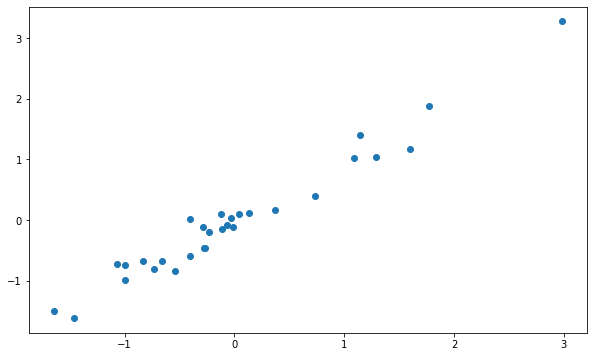

In [64]:
plt.figure(figsize=(10,6))

plt.scatter(normalizedRandomData["x1"], normalizedRandomData["x2"])


In [65]:
eigvecs[0,0], eigvecs[1,0] 

(-0.7988578335142531, 0.6015198765069314)

/var/folders/5l/gk6s2xx10qs0mkg4_9_vyp3h0000gn/T/ipykernel_69126/1946272414.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  k, b = np.linalg.lstsq(A, y)[0]
/var/folders/5l/gk6s2xx10qs0mkg4_9_vyp3h0000gn/T/ipykernel_69126/1946272414.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  k, b = np.linalg.lstsq(A, y)[0]


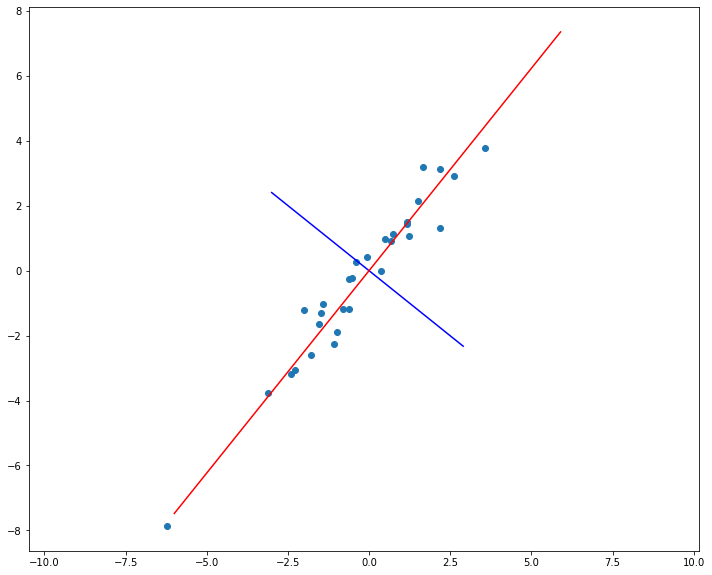

In [30]:
def drawLine2P(x,y, xlims, color):
    xrange = np.arange(xlims[0],xlims[1],0.1)
    A = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(A, y)[0]
    plt.plot(xrange, k*xrange + b, color)

plt.figure(figsize=(12,10))
plt.scatter(randomData.x, randomData.y)


drawLine2P((0, eigvecs[0,0]), (0, eigvecs[1,0]), (-3, 3), 'b')
drawLine2P((0, eigvecs[0,1]), (0, eigvecs[1,1]), (-6, 6), 'r')
plt.axis("equal");


### Eigenvalues Explain the Variance in the Data

* Eigenvalues explain the variance captured by their Eigenvectors


* We need to transform them into a percentage 
  * Dividing each eigenvalue by the sum of eigenvalues.
    
  


In [31]:
print("The variance captured by the first  eigenvector is: {}".format(eigvals[0]))

print("The variance captured by the second eigenvector is: {} ".format(eigvals[1]))

The variance captured by the first  eigenvector is: 0.13698555109772403
The variance captured by the second eigenvector is: 9.898575955290402 


In [32]:
print("The percentage of variance captured by the first eigenvector is: {}".format(eigvals[0]/ sum(eigvals)))
print("The variance captured by the second eigen vector is: {}".format(eigvals[1]/sum(eigvals)))

The percentage of variance captured by the first eigenvector is: 0.013650013605170574
The variance captured by the second eigen vector is: 0.9863499863948293



### Eigenvalues Explain the Variance in the Data
* The second eigenvector captures of 98.9% of the total variance in the data. 
* By projecting on that eigenvector, our data retains most of its variance. 
  * We can project on simply by multiplying the original data by the the eigenvector
  * As we did in the previous example

In [33]:
print("My eigenvectors are :\n %s" % eigvecs)

print("The selected eigenvector is:\n %s" % np.array([[eigvecs[0,1]], [eigvecs[1,1] ]]))


My eigenvectors are :
 [[-0.78005078 -0.62571621]
 [ 0.62571621 -0.78005078]]
The selected eigenvector is:
 [[-0.62571621]
 [-0.78005078]]


In [34]:
newData =  randomData.dot(np.array([[eigvecs[0,1]], [eigvecs[1,1]]]))
newData.columns = ['z']
newData.head()

,z
0,10.033712
1,4.881439
2,3.974085
3,3.805503
4,2.197665


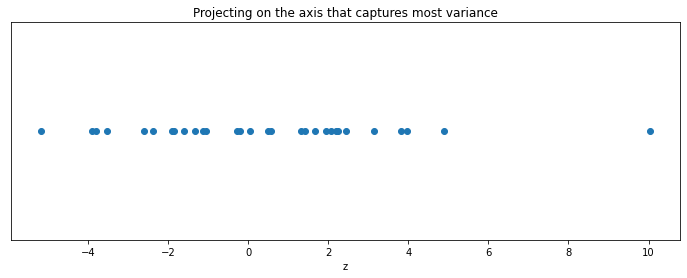

In [35]:
plt.figure(figsize=(12, 4))

plt.xlabel('z')
plt.title('Projecting on the axis that captures most variance')

plt.scatter(newData, [0 for _ in range(len(newData))])
ax = plt.gca()
ax.yaxis.set_visible(False)

## Running PCA with Scikit-Learn

* Scikit-Learn has an implementation of PCA similar that described above
  * Scikit-Learn also has many other dimensionality reduction algorithms
* The package finds the eigenvectors and eigenvalues and sort them based on the explained variance ratio   

In [36]:
pca = PCA(n_components=2)
_ = pca.fit(randomData)

In [37]:
    
#sns.regplot(x_axis, y_axis, ci=False, fit_reg=False)

pca.explained_variance_ratio_


array([0.98634999, 0.01365001])

In [38]:
pca.components_

array([[-0.62571621, -0.78005078],
       [ 0.78005078, -0.62571621]])

/var/folders/5l/gk6s2xx10qs0mkg4_9_vyp3h0000gn/T/ipykernel_69126/1946272414.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  k, b = np.linalg.lstsq(A, y)[0]
/var/folders/5l/gk6s2xx10qs0mkg4_9_vyp3h0000gn/T/ipykernel_69126/1946272414.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  k, b = np.linalg.lstsq(A, y)[0]


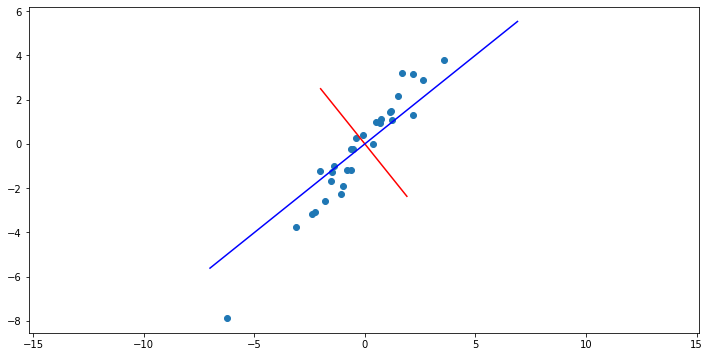

In [47]:
plt.figure(figsize=(12,6))
plt.scatter(randomData.x, randomData.y)

# drawLine2P((0, v[0,0]), (0, v[0,1]), (-6, 6), 'k')

drawLine2P((0, pca.components_[0,0]), (0, pca.components_[1,0]), (-2, 2), 'r')

drawLine2P((0, pca.components_[0,1]), (0, pca.components_[1,1]), (-7, 7), 'b')

plt.axis("equal");


In [40]:
print(pca.components_)

[[-0.62571621 -0.78005078]
 [ 0.78005078 -0.62571621]]


In [41]:
print(pca.explained_variance_)

[9.89857596 0.13698555]


In [42]:
print(pca.explained_variance_/sum(pca.explained_variance_))

[0.98634999 0.01365001]


In [43]:
X = randomData.to_numpy()

pca = PCA(n_components=2)

pca.fit(X)


PCA(n_components=2)

<img src="https://www.dropbox.com/s/y3nmp8p2o9akiht/eig_vecs.png?dl=1" alt="drawing" style="width:900px;"/>


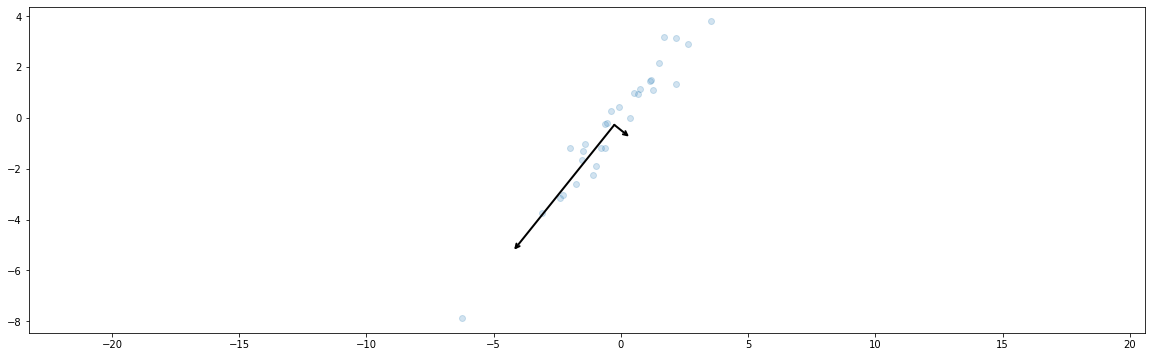

In [44]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.figure(figsize=(20,6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [45]:
print("The ration of explained variance is: %s " % pca.explained_variance_ratio_)

The ration of explained variance is: [0.98634999 0.01365001] 


### PCA Advantages and Limitations
* Advantages
  * Interpretable
  * Ideal for data where most variance is constrained to first dimensions.

* Limitations
  * non-linear weird and curved shaped surfaces necessitated development of more advanced algorithms like Manifold Learning. 
    * Linear dimensionality reduction cannot cluster data with non-linear global structure.
 * Does not handle large datasets
  


<img src="https://www.dropbox.com/s/ukkk7i4s4ppya0h/swiss_roll.png?dl=1" alt="drawing" style="width:500px;"/>

### PCA  Limitations
* PCA is unsupervised does not take labels into account.
  * If your data is labeled, PCA cannot take that information into considerations to produce better clusters
  * Method such as LDA or methods based on Correlation Analysis (CA) are used when label data is provided 

* Works well for plotting only when most of the variance is contained in the first 2 principal components
  * Often not the case of complicated datasets.

### Points Crowding Problem

* a major issue when reducing the dimensionality of high-dimensional data is the crowding issue.

  * Somewhat similar points in very high dimension collapsing on top of each other in lower dimensions 
  * A lot more space in higher dimensions than lower dimensions, so data can vary in many more ways in higher dimensions yet be very crowded in a lower dimension embedding.

![](https://www.dropbox.com/s/5qh34vny41e0hka/crowding.png?dl=1)

### PCA on Very Large Datasets

* PCA assumes that we can store the data, the covariance matrix in RAM.
  * This is often possible with datasets that have a very large number of features.
  * Few GB with a dataset with 15k features  
* May not scale for datasets having hundreds of thousands of features.
* Alternative implementations to handle large data
  * Incremental principal component analysis (IPCA) (implemented in scikit-learn)
  * Distributed computation (Implemented in Spark's mllib )
  * Probabilistic approach with theoretical guarantees (ex. ProPCA package)      
  * etc...